# Franchise Expansion Prediction

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hypothesis Function for Linear Regression

def hypothesis(thetarg, x):
    return np.dot(x, thetarg)

In [3]:
# Cost function used to calculate the error between hypothetic and actual value over m training examples

def cost(x, y, thetarg, msize):
    return float((1 / (2 * msize)) * np.dot((hypothesis(thetarg, x) - y).T, (hypothesis(thetarg, x) - y)))

In [23]:
# Gradient Descent method to minimize cost function in configurable alpha and iterations

def gradient_descent(x, y, thetarg, msize):
    jvec = []
    theta_history = []
    for i in range(num_iterations):
        theta_history.append(list(thetarg[:, 0]))
        jvec.append(cost(x, y, thetarg, msize))
        for j in range(len(thetarg)):
            thetarg[j] = thetarg[j] - (alpha / msize) * np.sum((hypothesis(thetarg, x) - y) *
                                                               np.array(x[:, j]).reshape(msize, 1))
    return thetarg, theta_history, jvec

In [5]:
# Loading file using numpy method loadtxt

data = np.loadtxt("/Users/akshatkumar/Downloads/machine-learning-ex1/ex1/ex1data1.txt", delimiter=',', usecols=[0, 1], unpack=True)

### Training Data Vizualization

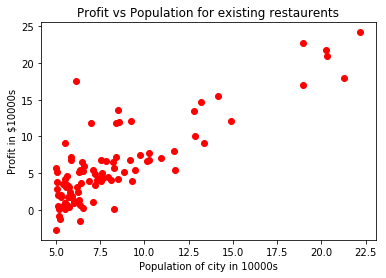

In [15]:
plt.title("Profit vs Population for existing restaurents")
plt.xlabel("Population of city in 10000s")
plt.ylabel("Profit in $10000s")
plt.scatter(data[0],data[1],color = 'r')

In [30]:
# Converting input to m x n dimensional matrix where m are number of training examples and n are features
X = np.transpose(np.array(data[:-1]))
X = np.insert(X, 0, 1, axis=1)
# Converting output to n dimensional vector
Y = np.transpose(np.array(data[-1:]))

### Setting Prameters for Linear Regression

In [37]:
# Setting number of iteration for cost function to attain saturation value and alpha to decide the rate to reach optimum
num_iterations = 2000
alpha = 0.01
m = Y.size
theta = np.zeros([X.shape[1], 1])

### Running Gradient Descent for cost function convergence

In [38]:
theta_final, thetahist, cost_compute = gradient_descent(X, Y, theta, m)

In [39]:
theta_final

array([[-3.79118595],
       [ 1.18254485]])

### Cost Function decrease 

In [40]:
iterations = list(range(1, num_iterations))
cost_compute.pop(0)

32.072733877455676

In [45]:
cost_compute[len(cost_compute)-1]

4.477970964832771

### Visualize Cost Function fall with increase in number of iterations

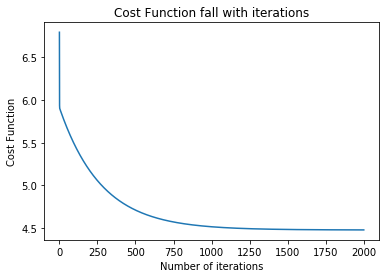

In [41]:
plt.title("Cost Function fall with iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.plot(iterations, cost_compute)

### Fit Regression Line into the dataset

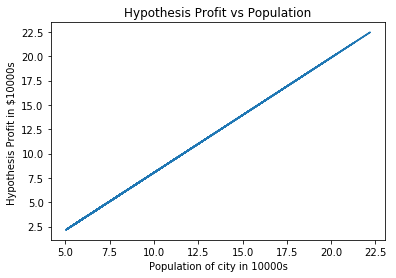

In [46]:
plt.title("Hypothesis Profit vs Population")
plt.xlabel("Population of city in 10000s")
plt.ylabel("Hypothesis Profit in $10000s ")
plt.plot(X[:, 1], hypothesis(theta_final, X))